In [14]:
import numpy as np
import matplotlib.pyplot as plt
K_agua = np.linspace(0.561, 0.6435, 50)
K = 0.5610 #Conductividad Térmica del agua a 0°C en [W/m*K]
Radio_Inicial = 0.0225 #[m]
R_agua = 0.0062 #radio gota de agua en [m]
masa_inicial_hielo = 0.0629 #[kg]
m_aceite = 15*masa_inicial_hielo
L = 334000 #[J/kg]
C_aceite = 1670 # Capacidad Calorifica del aceite vegetal en [J/kg*K]
C_agua = 4182 # Capacidad Calorifica del agua en [J/kg*K]
rho_hielo = 917.0
rho_agua = 1000.0
rho_aceite = np.linspace(928.96, 919.41, 20)
cte_1 = (3.0)/(4.0*np.pi*rho_hielo)
cte_2 = (3.0)/(4.0*np.pi*rho_agua)
g = 9.8
def ice_clock (T_aceite, T_hielo, masa_hielo, masa_aceite, n):
    n_segundos = n
    t = np.linspace(0, n_segundos, n_segundos + 1)
    m_gota = 0
    dQ_h = np.zeros(n_segundos)
    dQ_t = np.zeros(n_segundos)
    masas_hielo = np.zeros(n_segundos + 1)
    masas_hielo[0] = masa_inicial_hielo
    masa_agua = 0.0
    dt = 1
    temperaturas_aceite = np.zeros(n_segundos + 1)
    temperaturas_aceite[0] = T_aceite
    temperaturas_agua = np.zeros(n_segundos + 1)
    dx = 0.01
    dx_2 = R_agua/2.0
    dQ_a = np.zeros(n_segundos)
    T_agua = 0
    conteo = 1.0
    k_a = 0
    f = 0
    gotas = np.zeros(n_segundos)
    conteo_2 = 0.002467
    m_gota_limite = 0.002467
    n_gotas = 0
    cuenta = []
    masas_gotas = []
    masa_de_una_gota = []
    Rs = np.zeros(n_segundos)
    for i in range(n_segundos):
        if masa_agua > 0:
            hay_agua = 1.0
            f = 0.0
        else:
            hay_agua = 0.0
            f = 1.0
            
        
        if masas_hielo[i] > 0:
            hay_hielo = 1.0
        else:
            hay_hielo = 0.0
        Rs[i] = ((cte_1*(masas_hielo[0] - masa_agua))**(1.0/3.0))  
        dQ_h[i] = -4*np.pi*K*((cte_1*(masas_hielo[0] - masa_agua))**(2.0/3.0))*(temperaturas_aceite[i])*(dt/dx)*hay_hielo
        dQ_a[i] = -4*np.pi*K_agua[k_a]*((cte_2*masa_agua)**(2.0/3.0))*((temperaturas_aceite[i]) - (temperaturas_agua[i]))*(dt/dx_2)*hay_agua
        dQ_t[i] = dQ_h[i] + dQ_a[i]
        temperaturas_aceite[i+1] = temperaturas_aceite[0] + ((sum(dQ_t))/(m_aceite*C_aceite))
        temperaturas_agua[i+1] = temperaturas_agua[0]-((hay_agua*sum(dQ_a[:i]))/(C_agua*(masa_agua + f)))
        masa_agua = np.abs(sum(dQ_h))/L
        masas_hielo[i+1] = masas_hielo[0] - masa_agua
        
        if temperaturas_agua[i] >= conteo:
            k_a += 1
            conteo += 1.0
            
        if masa_agua < conteo_2:
            gotas[i] = 0
            masa_de_una_gota.append(masa_agua - (conteo_2 - m_gota_limite))
            
        if masa_agua >= conteo_2:
            gotas[i] = 1
            n_gotas += 1
            cuenta.append(i)
            masa_de_una_gota.append(0.0)
            #temperaturas_agua[i+1] = temperaturas_agua[i]*(n_gotas-1)/(n_gotas)
            conteo_2 += 0.002467
    #T_f = -((masas_hielo[0] - ((sum(dQ_h))/(L)))*L + ((sum(dQ_h))/(L))*C_agua*temperaturas_agua[-1] - m_aceite*C_aceite*temperaturas_aceite[0])*((1.0)/(m_aceite*C_aceite))
    t = t/60  
    #Q = np.zeros(n_segundos)
    #for i in range(len(t)-1):
        #Q[i] = sum(dQ_t[:i])

    #plt.figure(figsize = (10, 7))
    #plt.plot(t[:n_segundos], dQ_t[:n_segundos])
    #plt.grid()
    #plt.xlabel('t (min)')
    #plt.ylabel('Calor (J)')
    #plt.savefig('Calor')
    
    #plt.figure(figsize = (10, 7))
    #plt.plot(t[:n_segundos], dQ_h[:n_segundos])
    #plt.grid()
    #plt.xlabel('t (min)')
    #plt.ylabel('Calor_hielo (J)')
    #plt.savefig('Calor_hielo')

    #plt.figure(figsize = (10, 7))
    #plt.plot(t[:n_segundos], dQ_a[:n_segundos])
    #plt.grid()
    #plt.xlabel('t (min)')
    #plt.ylabel('Calor_agua (J)')
    #plt.savefig('Calor_agua')
    
    #plt.figure(figsize = (10, 7))
    #plt.plot(t[:n_segundos], temperaturas_aceite[:n_segundos])
    #plt.grid()
    #plt.xlabel('t (min)')
    #plt.ylabel('T_aceite (°C)')
    #plt.savefig('T_aceite')
    
    tt = t[:len(t)-1]
    plt.figure(figsize = (10, 7))
    plt.scatter(tt[gotas>0], gotas[gotas>0])
    plt.grid()
    plt.xlabel('t (min)')
    plt.ylabel('hay gota')
    plt.title('Temperatura Inicial del Aceite = {} °C'.format(T_aceite))
    plt.savefig('gotas')
    
    #plt.figure(figsize = (10, 7))
    #plt.plot(t[:n_segundos], masas_hielo[:n_segundos])
    #plt.grid()
    #plt.xlabel('t (min)')
    #plt.ylabel('masa_hielo (kg)')
    #plt.savefig('hielo')
    
    #plt.figure(figsize = (10, 7))
    #plt.plot(t[:n_segundos], Q[:n_segundos])
    #plt.grid()
    #plt.xlabel('t (min)')
    #plt.ylabel('Q acumulado (J)')
    #plt.savefig('Q_Acumulado')
    
    tt = tt[gotas>0]
    return gotas, tt
    #return np.array(masa_de_una_gota), masas_hielo, temperaturas_aceite, Rs

#EL SIGUIENTE CODIGO DENERA GRAFICAS DE PERIODO VS TIEMPO PARA DIFERENTES TEMPERATURAS INICIALES 
    #ms = []
    #for i in range(6, 40):
    #    c, d = ice_clock(i, 0, masa_inicial_hielo, m_aceite)
    #    periodo = []
    #    conteo = 0
    #    for j in range(len(c)):
    #        if c[j] == 0:
    #            conteo += 1
    #        else:
    #            periodo.append(conteo)
    #            conteo = 0
    #    print(d)
    #    T = np.array(periodo)
    #    ms.append(T)
    #    plt.figure(figsize = (10, 7))
    #    plt.plot(d, T)
    #    plt.grid()
    #    plt.xlabel('t(s)')
    #    plt.ylabel('Periodo (s)')
    #    plt.title('{} °C'.format(i))
    
#EL SIGUIENTE CODIGO GENERA GRAFICA DE PENDIENTE PROMEDIO VS TEMPERATURA INICIAL DEL ACEITE, PARA ESTUDIAR EL EFECTO DE LA TEMPERATURA EN EL CAMBIO DEL PERIODO CON EL TIEMPO

#mss = np.zeros(len(ms))
#ps = []
#proms = np.zeros(len(ms))
#for i in range(len(ms)):
#    for j in range(1, len(ms[i])):
#        m = (ms[i][j] - ms[i][j-1])/(d)
#        ps.append(m)
#    proms[i] = np.mean(np.array(ps))
#plt.figure(figsize = (10,7))
#plt.grid()
#plt.ylabel('Pendiente')
#plt.xlabel('T_aceite_inicial (°C)')
#plt.plot(proms)

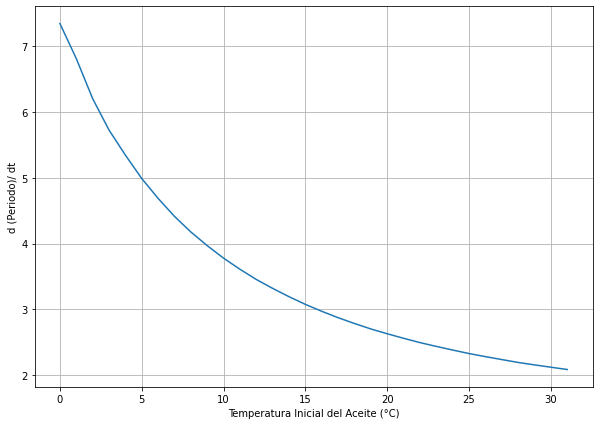

In [13]:
#EL SIGUIENTE CODIGO DENERA GRAFICAS DE PERIODO VS TIEMPO PARA DIFERENTES TEMPERATURAS INICIALES
ms = []
n = 1800
conteo_2 = 1
for i in range(8, 40):
#while conteo_2 <= 100:
    
    c, d = ice_clock(i, 0, 0.041, 0.44, n)
    periodo = []
    conteo = 0
    for j in range(len(c)):
        if c[j] == 0:
            conteo += 1
        else:
            periodo.append(conteo)
            conteo = 0

    T = np.array(periodo)
    ms.append(T)
    plt.figure(figsize = (10, 7))
    #plt.plot(d, T)
    #plt.grid()
    #plt.xlabel('t(s)')
    #plt.ylabel('Periodo (s)')
    plt.title('Masa Aceite = {} veces Masa Inicial Hielo '.format(5*conteo_2))
    #plt.savefig('Periodo {} veces Masa Inicial Hielo'.format(5*conteo_2))
    #conteo_2 += 1
mss = np.zeros(len(ms))
ps = []
proms = np.zeros(len(ms))
for i in range(len(ms)):
    for j in range(1, len(ms[i])):
        m = (ms[i][j] - ms[i][j-1])/(d)
        ps.append(m)
    proms[i] = np.mean(np.array(ps))

plt.figure(figsize = (10,7))
plt.grid()
plt.ylabel('d (Periodo)/ dt')
plt.xlabel('Temperatura Inicial del Aceite (°C)')
plt.plot(proms)
plt.savefig('Pendiente')

In [ ]:
masa_inicial_hielo = 0.0629 #[kg]
m_aceite = 15*masa_inicial_hielo
c, d = ice_clock(20, 0, masa_inicial_hielo, m_aceite, 1800)

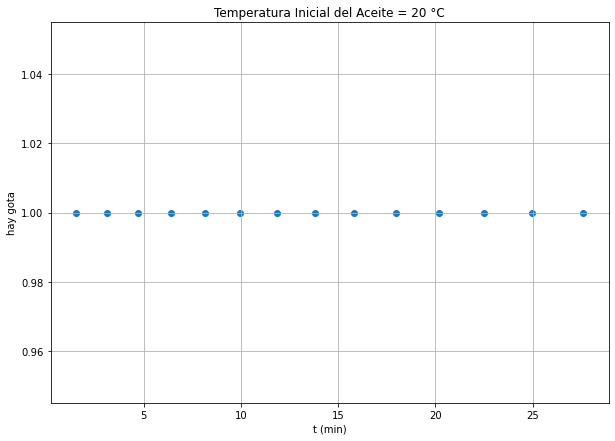

In [85]:
masa_inicial_hielo = 0.0629 #[kg]
m_aceite = 150*masa_inicial_hielo
c, d = ice_clock(20, 0, masa_inicial_hielo, m_aceite, 1800)

In [3]:
def densidad_aceite(T):
    rho_v = np.zeros(len(T))
    Temp = np.zeros(len(T))
    for j in range(len(Temp)):
        Temp[j] = np.int(T[j])
    for i in range(len(rho_v)):
        c = int(Temp[i] - 1)
        rho_v[i] = rho_aceite[c]
    return rho_v

def aceleracion_bajando(m_gota, rho_vegetal, r):
    a = np.zeros(len(m_gota))
    for i in range(len(a)):
        a[i] = ((m_gota[i] - rho_vegetal[i]*(4.0/3.0)*np.pi*r[i]*r[i]*r[i])/(m_gota[i]))*g
    return a

def aceleracion(m_hielo, m_gota, rho_vegetal, r):
    a_s = np.zeros(len(m_gota))
    d = 1
    for i in range(2, len(a_s)):
        if m_gota[i] < 0.0009:
            d = 0
        a_s[i] = (((rho_vegetal[i]*(4.0/3.0)*np.pi*r[i]*r[i]*r[i] - 917*(4.0/3.0)*np.pi*r[i]*r[i]*r[i])*d - m_gota[i])/(917*(4.0/3.0)*np.pi*r[i]*r[i]*r[i] + m_gota[i]))*g
    return a_s

def posicion(aceleracion):
    delta_t = 1
    x = np.zeros(len(aceleracion))
    for i in range(2, len(x)):
        x[i] = (1.0/4.0)*delta_t*delta_t*(aceleracion[i] + 2.0*aceleracion[i-1] + aceleracion[i-2])
    return x


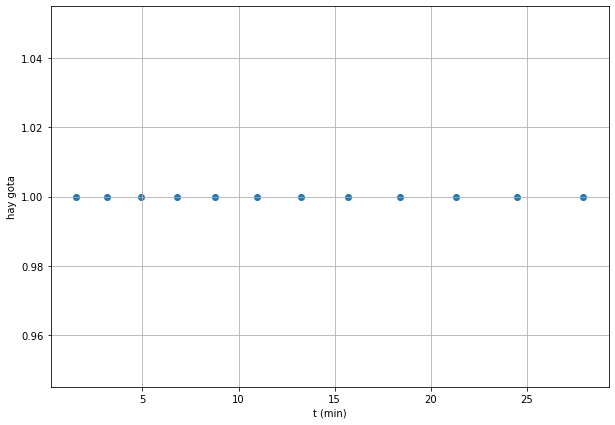

In [14]:
n = 1800
t = np.linspace(0,n,n+1)
matriz_gotas, masa_del_hielo, temperatura_del_aceite, radio = ice_clock(20, 0, masa_inicial_hielo, m_aceite, n)

#Rho = densidad_aceite(temperatura_del_aceite)
#A = aceleracion(masa_del_hielo, matriz_gotas, Rho, radio)
#P = posicion(A)

#plt.figure(figsize = (10,7))
#plt.plot(t[:n], P)
#plt.grid()

    


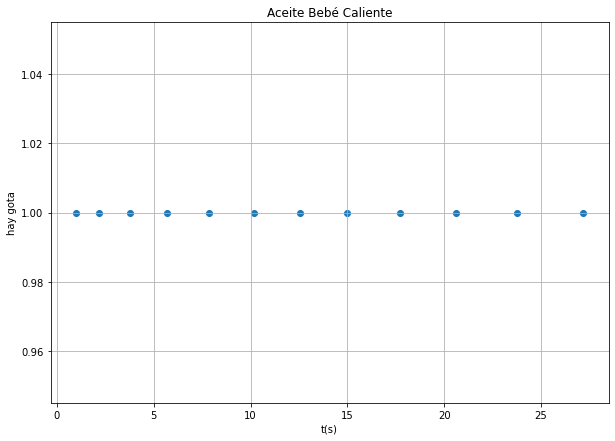

In [145]:
t_hot = np.array([59, 73, 95, 114, 131, 138, 142, 148, 162, 175, 189, 205])
t_h = np.zeros(len(t_hot))

for i in range(1, len(t_h)):
    t_h[i-1] = sum(t_hot[:i])
t_h[-1] = 1631
g = np.ones(len(t_h))
plt.figure(figsize = (10,7))
plt.scatter(t_h/60, g)
plt.grid()
plt.xlabel('t(s)')
plt.ylabel('hay gota')
plt.title('Aceite Bebé Caliente')
plt.savefig('AceiteBebeCaliente')

0.05591187668605124

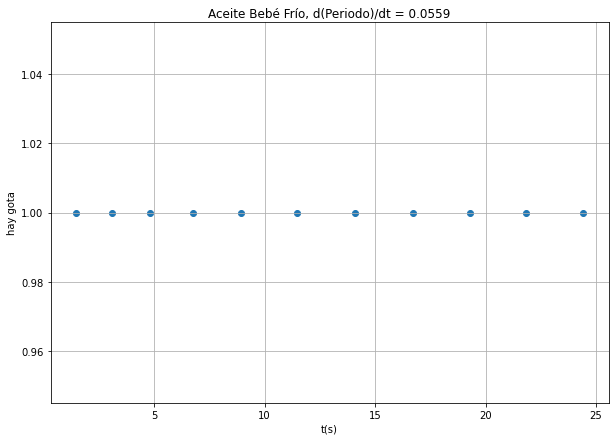

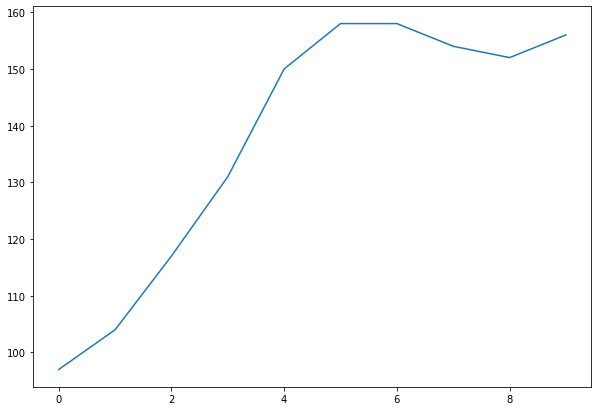

In [152]:
t_cold = np.array([88, 97, 104, 117, 131, 150, 158, 158, 154, 152, 156])
def promedio (tiempos):
    t_c = np.zeros(len(tiempos))
    for i in range(1, len(t_c)):
        t_c[i-1] = sum(tiempos[:i])
    t_c[-1] = sum(t_cold)
    t_cc = np.zeros(len(t_c))
    for i in range(len(t_cc)):
        t_cc[i] = t_c[i]
    g_c = np.ones(len(t_cc))

    T = np.zeros(len(t_cc))
    for i in range(1, len(T)):
        T[i-1] = (t_cc[i] - t_cc[i-1])
    TT = np.zeros(len(T)-1)
    for i in range(len(TT)):
        TT[i] = T[i]
    m = np.zeros(len(TT))
    for i in range(1, len(m)):
        m[i-1] = (TT[i] - TT[i-1])/(t_cc[i] - t_cc[i-1])
    mm = sum(m[:len(m)-1])/(len(m)-1)
    plt.figure(figsize = (10,7))
    plt.scatter(t_cc/60, g_c)
    plt.grid()
    plt.xlabel('t(s)')
    plt.ylabel('hay gota')
    plt.title('Aceite Bebé Frío, d(Periodo)/dt = {:.4F}'.format(mm))
    plt.savefig('AceiteBebeFrio')

    plt.figure(figsize = (10,7))
    plt.plot(TT)
    
    return mm
promedio(t_cold)

In [144]:
t_cc, t_c, T, TT, m, mm

(array([  88.,  185.,  289.,  406.,  537.,  687.,  845., 1003., 1157.,
        1309., 1465.]),
 array([  88.,  185.,  289.,  406.,  537.,  687.,  845., 1003., 1157.,
        1309., 1465.]),
 array([ 97., 104., 117., 131., 150., 158., 158., 154., 152., 156.,   0.]),
 array([ 97., 104., 117., 131., 150., 158., 158., 154., 152., 156.]),
 array([ 0.07216495,  0.125     ,  0.11965812,  0.14503817,  0.05333333,
         0.        , -0.02531646, -0.01298701,  0.02631579,  0.        ]),
 0.05591187668605124)

In [33]:
919*0.0005

0.4595

In [34]:
0.919*500

459.5

In [36]:
0.82*250 + 459.5

664.5

(array([0., 0., 0., ..., 0., 0., 0.]),
 array([ 1.66666667,  3.46666667,  5.36666667,  7.4       ,  9.58333333,
        11.93333333, 14.45      , 17.18333333, 20.15      , 23.38333333,
        26.91666667]))

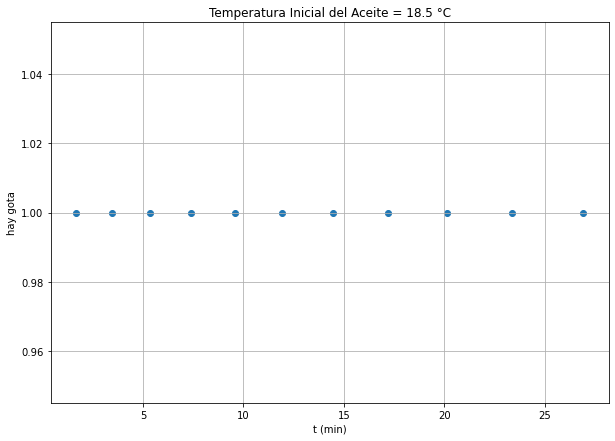

In [15]:
ice_clock(18.5, 0, 0.041, 0.44, 1800)

In [16]:
proms

array([7.34024786, 6.80834584, 6.20045782, 5.72326572, 5.34266028,
       4.98736364, 4.6858035 , 4.41265915, 4.17588161, 3.96845159,
       3.77852422, 3.6098417 , 3.45472995, 3.31944517, 3.1931142 ,
       3.07649022, 2.97155928, 2.87422882, 2.78632515, 2.70351037,
       2.63059115, 2.56179416, 2.49633337, 2.4383064 , 2.3832386 ,
       2.32988067, 2.28311431, 2.23867189, 2.19492941, 2.15774417,
       2.12244676, 2.08768124])